In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import shapiro, levene, mannwhitneyu, chi2_contingency

In [2]:
df = pd.read_csv("Table1_Input.csv")

In [3]:
df = df.iloc[:,-7:]

In [4]:
df.rename(columns={
    'Age_at_blood_collection': 'Age', 
    'demogr_sex': 'Sex',
    'demogr_race': "Race",
    "ansur_frax_bmi": "BMI",
    "subs_use_smoke_consolidated": "Smoking",
    
}, inplace=True)

In [5]:
df

,Age,Epigenetic_average,Epigenetic_deviation,Sex,Race,BMI,Smoking
0,87.961644,89.544023,1.582379,2.0,1.0,17.545506,0.0
1,87.561644,70.553625,-17.008019,2.0,1.0,23.871528,0.0
2,89.000000,81.538284,-7.461716,2.0,1.0,25.778835,1.0
3,86.460274,73.670066,-12.790208,1.0,1.0,27.038133,0.0
4,89.013699,81.852874,-7.160825,2.0,1.0,23.262468,0.0
...,...,...,...,...,...,...,...
306,86.816438,80.429665,-6.386774,2.0,1.0,29.299593,0.0
307,86.923288,80.676994,-6.246294,1.0,1.0,20.115458,2.0
308,89.712329,77.016686,-12.695643,2.0,1.0,19.223376,0.0
309,89.295890,77.126057,-12.169833,1.0,1.0,29.927159,2.0


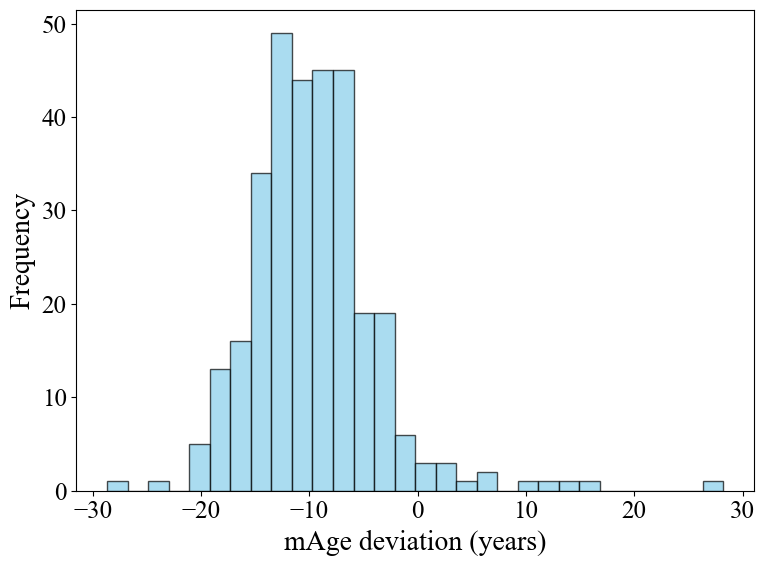

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set publication-style parameters
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Change to desired font
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})

# Histogram Plot
plt.figure(figsize=(8, 6))  # Size suitable for publication

plt.hist(df["Epigenetic_deviation"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("mAge deviation (years)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("mAge_deviation_histogram.png", format="png", dpi=600, bbox_inches="tight")

plt.show()


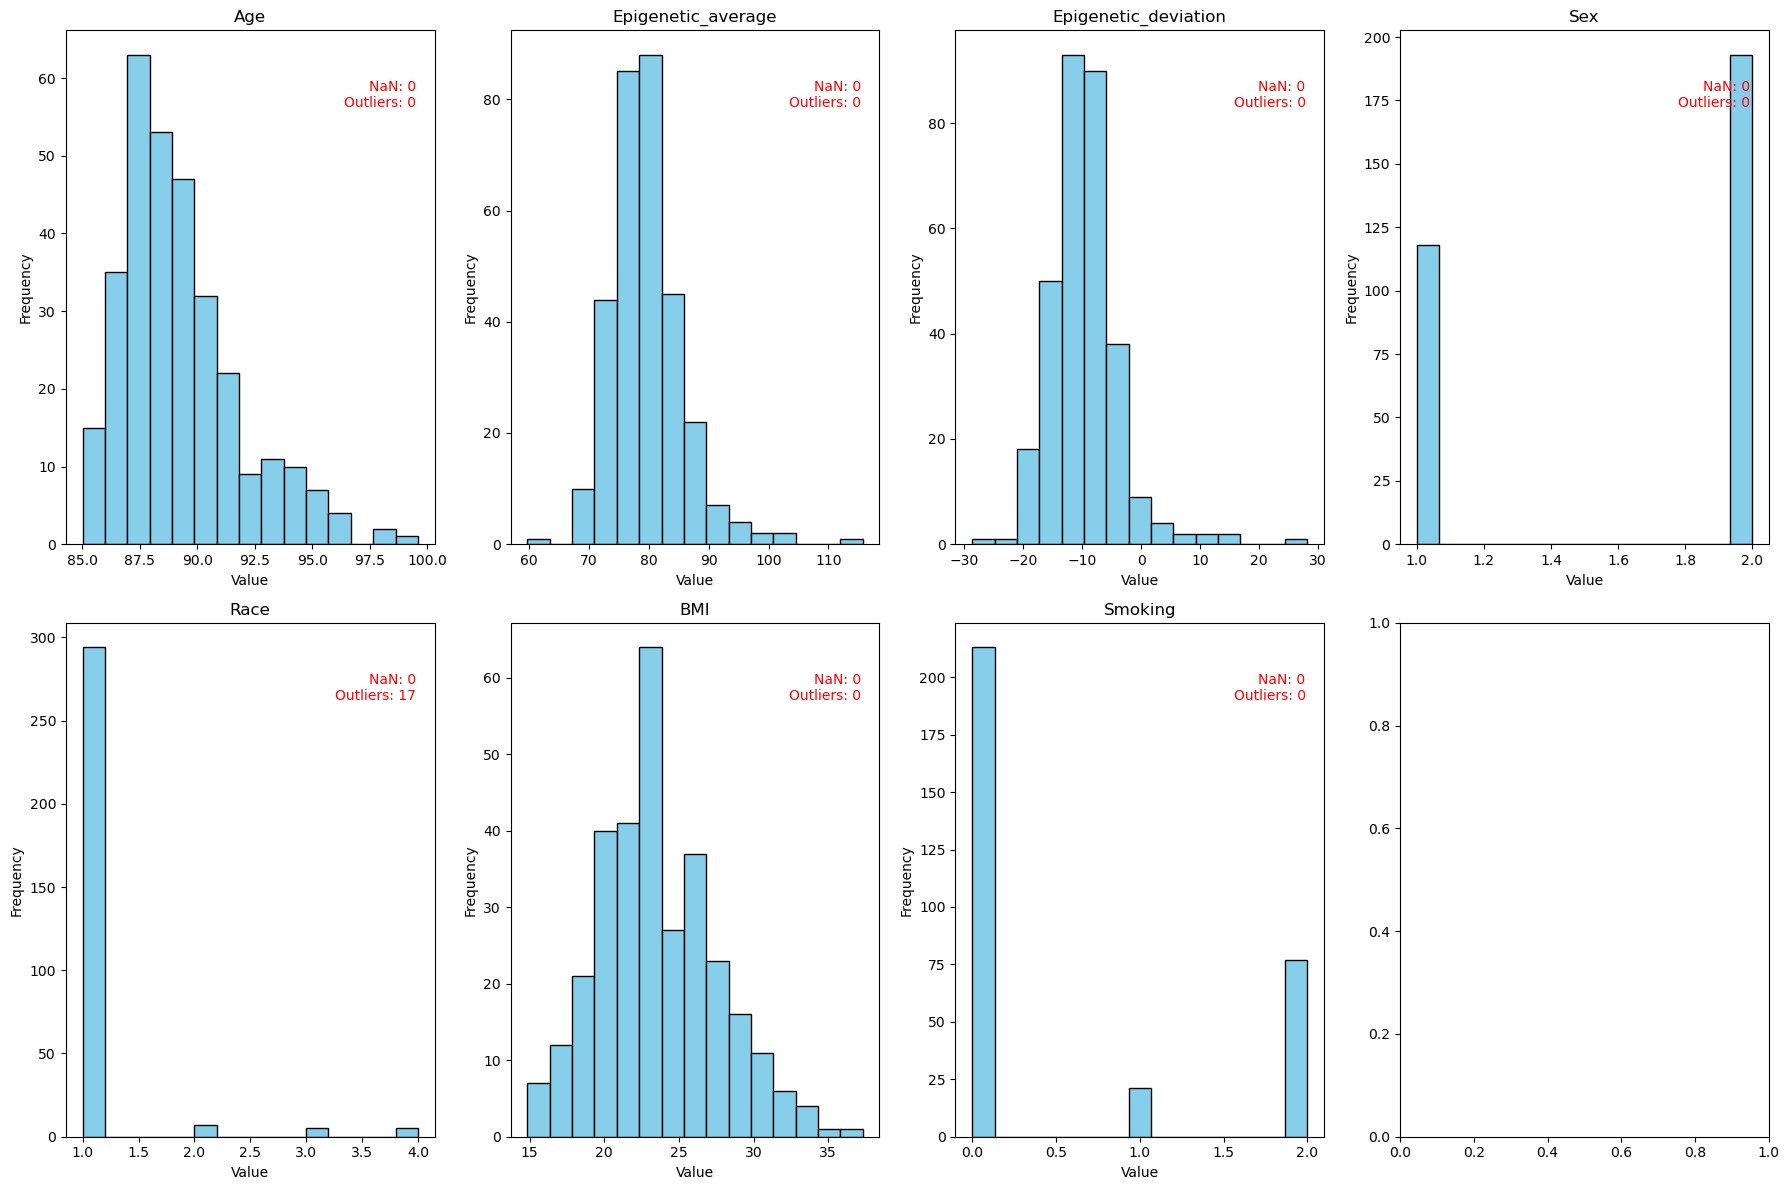

Summary Statistics with NaN and Outlier Counts:


,Age,Epigenetic_average,Epigenetic_deviation,Sex,Race,BMI,Smoking
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,89.194670,79.646705,-9.547965,1.620579,1.102894,23.579296,0.562701
std,2.604133,6.023527,5.988319,0.486025,0.470783,3.957485,0.862344
min,85.019178,59.726409,-28.684550,1.000000,1.000000,14.860540,0.000000
25%,87.343836,75.862658,-13.006611,1.000000,1.000000,20.734493,0.000000
50%,88.597260,79.003709,-9.864426,2.000000,1.000000,23.262468,0.000000
75%,90.410959,82.538150,-6.872423,2.000000,1.000000,25.859716,1.000000
max,99.586301,115.718471,28.211621,2.000000,4.000000,37.304867,2.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Outlier Count,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000



Non-Numeric Columns NaN Counts:


,NaN Count


In [14]:

# Selecting the specified columns
subset_df = df
# Convert column names to strings forfiltering
subset_df.columns = subset_df.columns.map(str)

# Consider "#NULL!" as NaN in columns ending with "date"
date_columns = [col for col in subset_df.columns if col.endswith('date')]
subset_df[date_columns] = subset_df[date_columns].replace("#NULL!", np.nan)

# Replace infinite values with NaN
subset_df = subset_df.replace([np.inf, -np.inf], np.nan)

# Separate numeric and non-numeric columns
numeric_subset = subset_df.select_dtypes(include=[np.number])
non_numeric_subset = subset_df.select_dtypes(exclude=[np.number])

# Generate summary statistics for numeric columns
summary_stats = numeric_subset.describe()

# Count NaN values in all columns
na_counts_numeric = numeric_subset.isna().sum()
na_counts_non_numeric = non_numeric_subset.isna().sum()

# Detect outliers that don't make sense
Q1 = numeric_subset.quantile(0.25)
Q3 = numeric_subset.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_subset < (Q1 - 50 * IQR)) | (numeric_subset > (Q3 + 50 * IQR))).sum()

# Add NaN counts and outlier counts to the summary statistics for numeric columns
summary_stats.loc['NaN Count'] = na_counts_numeric
summary_stats.loc['Outlier Count'] = outliers

# Prepare a summary for non-numeric columns (just report NaN counts)
non_numeric_summary = pd.DataFrame({'NaN Count': na_counts_non_numeric})

# Plotting distributions for numeric columns and reporting NaN counts for all
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(subset_df.columns):
    if col in numeric_subset.columns:
        axes[i].hist(numeric_subset[col].dropna(), bins=15, color='skyblue', edgecolor='black')
        axes[i].set_title(f"{col}")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
        # Annotate NaN count and outlier count
        axes[i].annotate(f"NaN: {na_counts_numeric[col]}\nOutliers: {outliers[col]}", 
                         xy=(0.95, 0.85), xycoords='axes fraction', fontsize=10, 
                         ha='right', color='red')
    else:
        axes[i].text(0.5, 0.5, f"Non-Numeric\nNaN: {na_counts_non_numeric[col]}", 
                     horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
        axes[i].set_title(f"{col}")
        axes[i].axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

# Print the summary statistics with NaN and Outlier Counts
print("Summary Statistics with NaN and Outlier Counts:")
display(summary_stats)

# Print the NaN counts for non-numeric columns
print("\nNon-Numeric Columns NaN Counts:")
display(non_numeric_summary)

In [16]:
above_zero_count = df[df['Epigenetic_deviation'] > 0].shape[0]
print(f"Number of samples with Epigenetic_deviation above 0: {above_zero_count}")


Number of samples with Epigenetic_deviation above 0: 14


In [15]:
import pandas as pd
import numpy as np

# Helper function to format numbers as per the rule
def format_number(value):
    if isinstance(value, (int, float)):
        return f"{value:.3g}"  # Format to a total of 3 significant digits
    else:
        return value

# Define the updated columns
demographic_columns = [
    "Age", 'Sex', 'Race', 'BMI', 'Smoking', 'Epigenetic_deviation'
]

# Initialize a dictionary to store the summary data
summary_data = {}

# Calculate the total counts
total_count = df.shape[0]

# Loop through each column to summarize
for col in demographic_columns:
    if col == 'Sex':
        # Specific handling for sex (showing only female counts, assuming 1=Male, 2=Female)
        female_counts = df['Sex'].value_counts().get(2, 0)  # Assuming 2 = Female
        total_percentage = round((female_counts / total_count) * 100, 1)
        
        summary_data[col] = f"{format_number(female_counts)} ({format_number(total_percentage)}%)"

    elif col == 'Race':
        # Handling race (showing counts and percentages)
        total_race_counts = df[col].value_counts()
        total_race_percentages = (total_race_counts / total_count) * 100
        
        # Create race summary
        for race in total_race_counts.index:
            summary_data[f"Race: {race}"] = f"{format_number(total_race_counts[race])} ({format_number(round(total_race_percentages[race], 1))}%)"
    
    elif col == 'Smoking':
        # Handling different smoking statuses (assuming 0 = non-smoker, 1 = current smoker, 2 = ex-smoker)
        for status, label in zip([0, 1, 2], ["Non-smoker", "Current smoker", "Ex-smoker"]):
            total_status_counts = df[col].value_counts().get(status, 0)
            total_percentage = round((total_status_counts / total_count) * 100, 1)
            summary_data[f"Smoking status: {label}"] = f"{format_number(total_status_counts)} ({format_number(total_percentage)}%)"
    
    elif pd.api.types.is_numeric_dtype(df[col]):
        # For numeric columns (BMI, Epigenetic_deviation)
        total_mean = df[col].mean()
        total_std = df[col].std(ddof=0)
        total_median = df[col].median()
        total_iqr = f"{df[col].quantile(0.25):.3g} - {df[col].quantile(0.75):.3g}"
        
        # Store the mean ± SD and median [IQR] for the numeric columns
        summary_data[col] = f"{format_number(total_median)} [{total_iqr}]"

# Create DataFrame from summary_data
summary_df = pd.DataFrame(summary_data, index=['Total']).T

summary_df.to_excel("Table1.xlsx", index=True)

summary_df


,Total
Age,88.6 [87.3 - 90.4]
Sex,193 (62.1%)
Race: 1.0,294 (94.5%)
Race: 2.0,7 (2.3%)
Race: 3.0,5 (1.6%)
Race: 4.0,5 (1.6%)
BMI,23.3 [20.7 - 25.9]
Smoking status: Non-smoker,213 (68.5%)
Smoking status: Current smoker,21 (6.8%)
Smoking status: Ex-smoker,77 (24.8%)


In [71]:
#TABLE 2

# Assuming df is your DataFrame
# Define your updated columns and group definition
df['Group'] = df['Epigenetic_deviation'].apply(lambda x: 'Worse' if x >= np.median(df["Epigenetic_deviation"]) else 'Better')

# Define the new demographic columns
demographic_columns = [
    "Age", 'Sex', 'Race', 'BMI', 'Smoking', 'Epigenetic_deviation'
]

# Initialize summary DataFrame and dictionary for storing p-values
summary_df = pd.DataFrame()
p_values = {}
summary_data = {}

# Calculate the total counts
total_count = df.shape[0]
group_counts = df['Group'].value_counts()

# Loop through each column to summarize
for col in demographic_columns:
    if col == 'Sex':
        # Specific handling for sex (showing only female counts, assuming 1=Male, 2=Female)
        female_counts = df[df['Sex'] == 2].groupby('Group').size()
        total_females = df['Sex'].value_counts()[2]
        total_percentage = round((total_females / total_count) * 100, 1)
        percentages = round((female_counts / group_counts) * 100, 1)
        
        summary_data[col] = {
            'Total (N={})'.format(total_count): f"{total_females} ({total_percentage}%)",
            'Worse (n={})'.format(group_counts['Worse']): f"{female_counts.get('Worse', 0)} ({percentages.get('Worse', 0):.1f}%)", 
            'Better (n={})'.format(group_counts['Better']): f"{female_counts.get('Better', 0)} ({percentages.get('Better', 0):.1f}%)"
        }
        
        # Chi-square test for sex
        contingency_table = pd.crosstab(df["Sex"], df['Group'])
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        p_values[col] = p_val

    elif col == 'Race':
        # Handling race (counts and percentages)
        race_counts = df.groupby(['Group', col]).size().unstack(fill_value=0)
        total_race_counts = df[col].value_counts()
        race_percentages = (race_counts.T / group_counts).T * 100
        total_race_percentages = (total_race_counts / total_count) * 100
        
        # Chi-square for race
        contingency_table = pd.crosstab(df[col], df['Group'])
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        
        for race in total_race_counts.index:
            summary_data[f"Race: {race}, n (%)"] = {
                'Total (N={})'.format(total_count): f"{total_race_counts[race]} ({round(total_race_percentages[race], 1)}%)",
                'Worse (n={})'.format(group_counts['Worse']): f"{race_counts[race].get('Worse', 0)} ({round(race_percentages[race].get('Worse', 0), 1)}%)", 
                'Better (n={})'.format(group_counts['Better']): f"{race_counts[race].get('Better', 0)} ({round(race_percentages[race].get('Better', 0), 1)}%)"
            }
        
            p_values[f"Race: {race}, n (%)"] = p_val
    
    elif col == 'Smoking':
        # Chi-square test applied to smoking status
        contingency_table = pd.crosstab(df[col], df['Group'])
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        
        # Handling different smoking statuses
        for status, label in zip([0, 1, 2], ["Non-smoker", "Current smoker", "Ex-smoker"]):
            status_counts = df[df[col] == status].groupby('Group').size()
            total_status_counts = df[col].value_counts().get(status, 0)
            total_percentage = round((total_status_counts / total_count) * 100, 1)
            percentages = round((status_counts / group_counts) * 100, 1)

            summary_data[f"Smoking status: {label}, n (%)"] = {
                'Total (N={})'.format(total_count): f"{total_status_counts} ({total_percentage}%)",
                'Worse (n={})'.format(group_counts['Worse']): f"{status_counts.get('Worse', 0)} ({percentages.get('Worse', 0):.1f}%)",
                'Better (n={})'.format(group_counts['Better']): f"{status_counts.get('Better', 0)} ({percentages.get('Better', 0):.1f}%)"
            }

            p_values[f"Smoking status: {label}, n (%)"] = p_val

    elif pd.api.types.is_numeric_dtype(df[col]):
        # Handling continuous variables (BMI, Epigenetic_deviation, etc.)
        group1 = df[df['Group'] == 'Better'][col]
        group2 = df[df['Group'] == 'Worse'][col]

        # Normality test
        stat1, p1 = shapiro(group1)
        stat2, p2 = shapiro(group2)

        if p1 > 0.05 and p2 > 0.05:
            # Normal distribution: mean ± SD
            group_stats = df.groupby('Group')[col].agg(['mean', 'std'])
            total_mean = round(df[col].mean(), 2)
            total_std = round(df[col].std(ddof=0), 2)
            
            summary_data[col] = {
                'Total (N={})'.format(total_count): f"{total_mean} ± {total_std}",
                'Worse (n={})'.format(group_counts['Worse']): f"{round(group_stats['mean'].get('Worse', 0), 2)} ± {round(group_stats['std'].get('Worse', 0), 2)}", 
                'Better (n={})'.format(group_counts['Better']): f"{round(group_stats['mean'].get('Better', 0), 2)} ± {round(group_stats['std'].get('Better', 0), 2)}"
            }

            # Use t-test for normally distributed data
            _, p_val = ttest_ind(group1, group2)
        else:
            # Non-normal distribution: median [IQR] and Mann-Whitney U test
            group_stats = df.groupby('Group')[col].agg(['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
            group_stats.columns = ['median', '25th', '75th']
            total_median = round(df[col].median(), 2)
            total_iqr = f"{round(df[col].quantile(0.25), 2)} - {round(df[col].quantile(0.75), 2)}"
            
            summary_data[col] = {
                'Total (N={})'.format(total_count): f"{total_median} [{total_iqr}]",
                'Worse (n={})'.format(group_counts['Worse']): f"{round(group_stats['median'].get('Worse', 0), 2)} [{round(group_stats['25th'].get('Worse', 0), 2)} - {round(group_stats['75th'].get('Worse', 0), 2)}]", 
                'Better (n={})'.format(group_counts['Better']): f"{round(group_stats['median'].get('Better', 0), 2)} [{round(group_stats['25th'].get('Better', 0), 2)} - {round(group_stats['75th'].get('Better', 0), 2)}]"
            }

            # Use Mann-Whitney U test for non-normally distributed data
            _, p_val = mannwhitneyu(group1, group2)
        
        p_values[col] = p_val

# Create DataFrame from summary_data
summary_df = pd.DataFrame(summary_data).T

# Add p-values column
summary_df['p-value*'] = pd.Series(p_values).round(3)

summary_df.to_excel("Table2.xlsx", index=True)

# Display the summary table to review
summary_df

,Total (N=311),Worse (n=156),Better (n=155),p-value*
Age,88.6 [87.34 - 90.41],88.04 [87.1 - 89.9],89.16 [87.89 - 90.89],0.000
Sex,193 (62.1%),79 (50.6%),114 (73.5%),0.000
"Race: 1.0, n (%)",294 (94.5%),146 (93.6%),148 (95.5%),0.541
"Race: 2.0, n (%)",7 (2.3%),3 (1.9%),4 (2.6%),0.541
"Race: 3.0, n (%)",5 (1.6%),4 (2.6%),1 (0.6%),0.541
"Race: 4.0, n (%)",5 (1.6%),3 (1.9%),2 (1.3%),0.541
BMI,23.26 [20.73 - 25.86],22.64 [20.45 - 25.34],23.53 [21.59 - 26.5],0.007
"Smoking status: Non-smoker, n (%)",213 (68.5%),89 (57.1%),124 (80.0%),0.000
"Smoking status: Current smoker, n (%)",21 (6.8%),16 (10.3%),5 (3.2%),0.000
"Smoking status: Ex-smoker, n (%)",77 (24.8%),51 (32.7%),26 (16.8%),0.000


In [72]:
# List of columns to remove
to_remove = [
    'Epigenetic_average'
]

# Remove the specified columns from the DataFrame
df = df.drop(columns=to_remove)

df_encoded = pd.get_dummies(df, columns=['Race', 'Sex', 'Smoking'], drop_first=False)  # One-hot encode categorical variables
# Replace True with 1 and False with 0 in the entire DataFrame
df = df_encoded.replace({True: 1, False: 0})
df

df.to_csv("FINAL_GENUS_TAXA_CLR.csv", index=False)